In [58]:
import pandas as pd
import numpy as np
train=pd.read_csv("Train.csv")

In [59]:
test=pd.read_csv("Test.csv")

In [60]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [61]:

y_train=np.array(train.target)
y_test=np.array(test.target)


In [62]:
train=np.array(train)
test=np.array(test)
x_train=np.array(train[:,:5])
x_test=np.array(test[:,:5])
ones = np.ones((x_train.shape[0],1))
x_train = np.hstack((ones,x_train))
ones = np.ones((x_test.shape[0],1))
x_test = np.hstack((ones,x_test))
print(y_train.shape)
x_train=(x_train-x_train.mean())/x_train.std()
x_test=(x_test-x_test.mean())/x_test.std()


(1600,)


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression(normalize=True)
lr.fit(x_train[:,1:],y_train)
print(lr.coef_)
print(lr.intercept_)

[29.48547523 92.04935807  8.22583053 44.47152069  2.50249268]
31.726627962218288


In [65]:
print("training score is %0.4f"%lr.score(x_train[:,1:],y_train))
print("training score is %0.4f"%lr.score(x_test[:,1:],y_test))

training score is 0.9661
training score is 0.9686


# 1 features
it is 5

In [66]:
## 2.gradient descent 

In [67]:
import numpy as np

In [68]:
y_train=np.array(y_train)
x_train=np.array(x_train)

In [69]:
def hypothesis(theta,X):
    return(np.dot(X,theta))
        
        

In [70]:
def gradient(theta,y,x,indices):
    grad=np.zeros((x.shape[1]))
    for j in range(x.shape[1]):
        for i in indices:
            grad[j]+=(y[i]-hypothesis(theta,x[i]))*x[i][j]
    return(grad*0.5)
    
    

In [71]:
def error(theta,x,y):
    loss=0
    m=x.shape[0]
    for i in range(m):
        hyp=hypothesis(theta,x[i])
        loss+=(hyp-y[i])**2
    return((loss*0.5)/m)

In [72]:
indices=np.arange(x_train.shape[0])
np.random.shuffle(indices)
indices=indices[:1]
print(indices)

[1082]


In [185]:
def gradientdescent(x,y,learning_rate=0.001,batch_size=5):
    l=[1]*6
    theta=np.array(l)
    err=[]
    indices=np.arange(x.shape[0])
  
    for i in range(1000): 
        indices=np.arange(x.shape[0])
        np.random.shuffle(indices)
        indices=indices[:batch_size]
        theta=theta+learning_rate*gradient(theta,y,x,indices)
        err.append(error(theta,x,y))
        
    return theta,err
    

## for stochastic 

In [186]:
final_theta,errf=gradientdescent(x_train,y_train)
print(final_theta)
print(errf[50:])

[23.1213551  26.29441226 83.61677964  4.02006451 39.62436005 -0.21330164]
[4670.034895797752, 4660.463350903028, 4631.517937491728, 4612.640274178228, 4597.611443248423, 4590.191854627367, 4578.212444077054, 4566.762647607766, 4517.669038323005, 4508.460761597234, 4506.499113997032, 4469.436898830595, 4442.941610749088, 4424.573341428441, 4397.998249503832, 4372.775724025371, 4358.032447067737, 4336.649371166806, 4317.043937583326, 4305.03530845793, 4300.233068245612, 4282.472856107529, 4222.82839247923, 4214.672249501014, 4179.97117096154, 4165.037521691342, 4155.78855745005, 4138.699970374469, 4104.9927148173765, 4070.7744792877147, 4064.768815482509, 4037.6597465670197, 4023.528499363317, 4001.0239197707824, 3996.4296415691124, 3928.048595829588, 3910.717313091422, 3894.6603952250075, 3879.7048776068527, 3853.8577520611116, 3840.5551657730107, 3837.11635780808, 3824.929038853536, 3789.485595539462, 3772.1731265697704, 3753.4022297902625, 3748.9575468292514, 3743.814744095937, 3727.8

In [179]:
import matplotlib.pyplot as plt
m=x_train.shape[0]

## GD

In [180]:

ftheta,err=gradientdescent(x_train,y_train,batch_size=m)
print(ftheta)
print(err)

[37.09046246 29.48547523 92.04935807  8.22583053 44.47152069  2.50249268]
[675.6199528698089, 340.9547185089705, 250.3596375028084, 221.56267653471798, 212.2468222874982, 209.22643063606682, 208.2468649829285, 207.92916150244253, 207.82611980198843, 207.79269995539093, 207.78186078740652, 207.77834528458024, 207.77720509004004, 207.77683528701098, 207.77671534758457, 207.77667644723778, 207.7766638305605, 207.77665973855244, 207.77665841137795, 207.77665798093133, 207.7766578413226, 207.77665779604322, 207.7766577813579, 207.77665777659445, 207.77665777504976, 207.77665777454902, 207.7766577743867, 207.77665777433376, 207.77665777431605, 207.7766577743113, 207.77665777430929, 207.77665777430855, 207.77665777430826, 207.77665777430866, 207.7766577743083, 207.7766577743081, 207.77665777430838, 207.77665777430815, 207.77665777430792, 207.77665777430852, 207.7766577743079, 207.7766577743085, 207.7766577743079, 207.77665777430852, 207.77665777430832, 207.77665777430784, 207.77665777430855, 

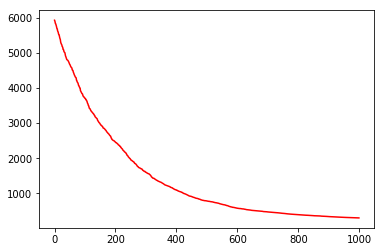

In [187]:
plt.plot(errf,color='red')

plt.show()

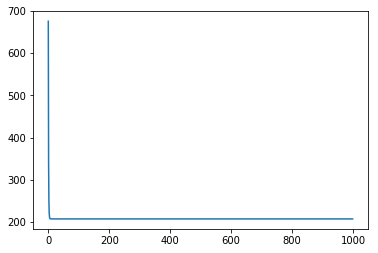

In [176]:
plt.plot(err)


plt.show()

In [188]:
def coeffofdet(x,y,ftheta):
    m=x.shape[0]
    upp=0
    low=0
    for i in range(m):
        upp+=(y[i]-hypothesis(ftheta,x[i]))**2
        low+=(y[i]-y.mean())**2
    coeff=1-(upp/low)
    return coeff 

In [189]:
#stochastic training
print(coeffofdet(x_train,y_train,final_theta))

0.950588175656698


In [190]:
#for test function
finaltheta,err=gradientdescent(x_test,y_test,batch_size=m)
print("calculated score and theta")
print(finaltheta)
print(coeffofdet(x_test,y_test,finaltheta))
print()
print("computer theta and score")
lr=LinearRegression(normalize=True)
lr.fit(x_test[:,:5],y_test)
print(lr.coef_)
print(lr.intercept_)
print("theta")
print(lr.score(x_test[:,:5],y_test))

calculated score and theta
[40.72040416 29.80511668 91.50686674  8.80985783 44.40900779  1.52480828]
0.9694306931203651

computer theta and score
[ 0.         29.88481279 91.6266397   8.63863882 44.39606669]
34.434099220786194
theta
0.9692748081731078


In [191]:
#GD training
print(coeffofdet(x_train,y_train,ftheta))

0.9660939669975617


In [192]:
#test dataset is better


In [193]:
#prediction on test data set
m=x_test.shape[0]
ft,errr=gradientdescent(x_test,y_test,batch_size=m)
print(hypothesis(ft,x_test[390]))
print(y_test[390])

56.26228818527013
30.141253799941968
